In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tarefa B1 - B2

## Importação dos dados do Fortran

In [2]:
df = pd.read_csv('./periodos.csv', sep=',', header=0)
df.head()

,theta,periodo_sim,periodo_int,periodo_apx
0,1.570796,7.41,7.416392,7.252131
1,1.555088,7.38,7.390000,7.232849
2,1.539380,7.36,7.364057,7.213761
3,1.523672,7.33,7.338557,7.194867
4,1.507964,7.31,7.313490,7.176166


## Gráfico de $T(\theta_0)$

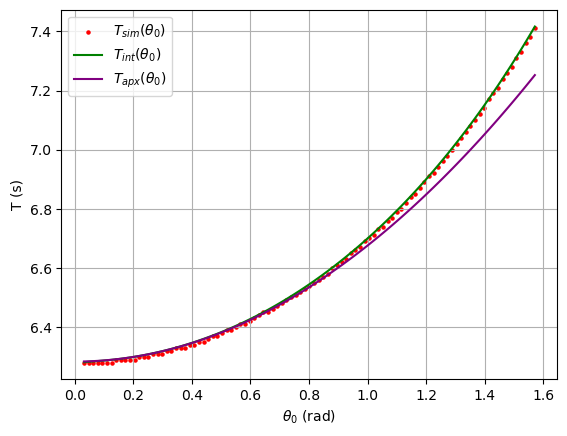

In [3]:
f1, ax1 = plt.subplots()
ax1.scatter(df['theta'], df['periodo_sim'], label='$T_{sim}(\\theta_0)$', s=5, color='red')
ax1.plot(df['theta'], df['periodo_int'], label='$T_{int}(\\theta_0)$', color='green')
ax1.plot(df['theta'], df['periodo_apx'], label='$T_{apx}(\\theta_0)$', color='purple')
ax1.set_xlabel('$\\theta_0$ (rad)')
ax1.set_ylabel('T (s)')
ax1.grid()
ax1.legend()

## Erro absoluto entre $T_{int}$ e $T_{sim}$

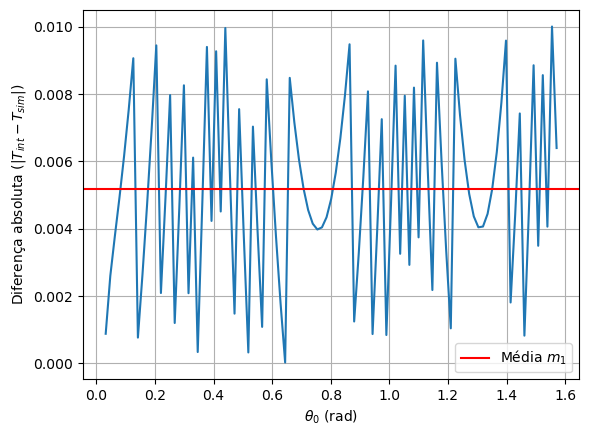

In [4]:
f2, ax2 = plt.subplots()
dif = abs(df['periodo_int']-df['periodo_sim'])
mean = np.mean(dif)
ax2.plot(df['theta'], dif)
ax2.set_xlabel('$\\theta_0$ (rad)')
ax2.axhline(mean, label='Média $m_1$', color='red')
ax2.set_ylabel('Diferença absoluta ($|T_{int} - T_{sim}|$)')
ax2.grid()
ax2.legend()

## Erro absoluto entre $T_{int}$ e $T_{apx}$

In [5]:
dif = abs(df['periodo_int']-df['periodo_apx'])
query = dif[np.isclose(np.array(dif), mean, 1e-1)]
angulos_idx = [i for i in query.index]
first_idx = angulos_idx[0]

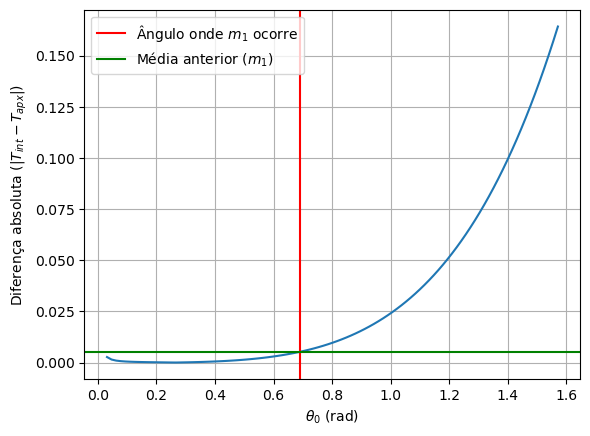

In [6]:
f3, ax3 = plt.subplots()
ax3.plot(df['theta'], dif)
ax3.set_xlabel('$\\theta_0$ (rad)')
ax3.axvline(df.iloc[first_idx]['theta'], label='Ângulo onde $m_1$ ocorre', color='red')
ax3.axhline(mean, label='Média anterior ($m_1$)', color='green')
ax3.set_ylabel('Diferença absoluta ($|T_{int} - T_{apx}|$)')
ax3.grid()
ax3.legend()

# Tarefa B3

## Importação de dados do Fortran

In [7]:
df = pd.read_csv('./b3_theta_t.csv', sep=',', header=0)
df.head()

,t,theta
0,0.00,0.140000
1,0.01,0.139986
2,0.02,0.139958
3,0.03,0.139916
4,0.04,0.139861


## Gráfico de $\theta(t)$

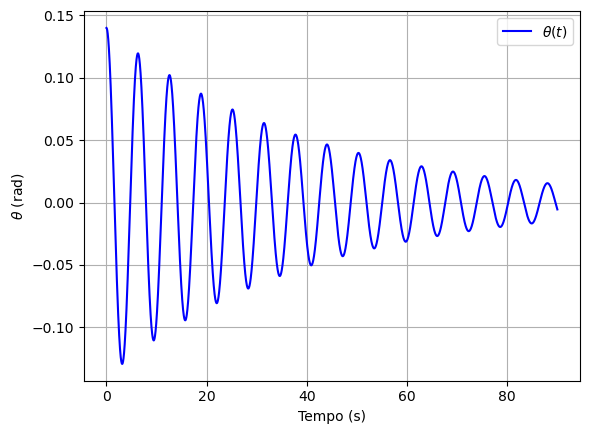

In [8]:
f4, ax4 = plt.subplots()
ax4.plot(df['t'], df['theta'], color='blue', label='$\\theta(t)$')
ax4.set_xlabel('Tempo (s)')
ax4.set_ylabel('$\\theta$ (rad)')
ax4.grid()
ax4.legend()

## Tarefa B4

## Importação de dados do Fortran

In [9]:
df1_g1 = pd.read_csv('./b4_dados_f0_1_g_1.csv', sep=',', header=0)
df2_g1 = pd.read_csv('./b4_dados_f0_2_g_1.csv', sep=',', header=0)
df3_g1 = pd.read_csv('./b4_dados_f0_3_g_1.csv', sep=',', header=0)
df1_g2 = pd.read_csv('./b4_dados_f0_1_g_2.csv', sep=',', header=0)
df2_g2 = pd.read_csv('./b4_dados_f0_2_g_2.csv', sep=',', header=0)
df3_g2 = pd.read_csv('./b4_dados_f0_3_g_2.csv', sep=',', header=0)
df3_g2.head()

,t,theta,w
0,0.00,0.140000,0.000000
1,0.04,0.139777,-0.005582
2,0.08,0.139386,-0.009763
3,0.12,0.138884,-0.012566
4,0.16,0.138323,-0.014017


## Gráfico de $\theta(t)$ e $\omega(t)$ para $F_0 = 0$ e $\gamma = 0.05$

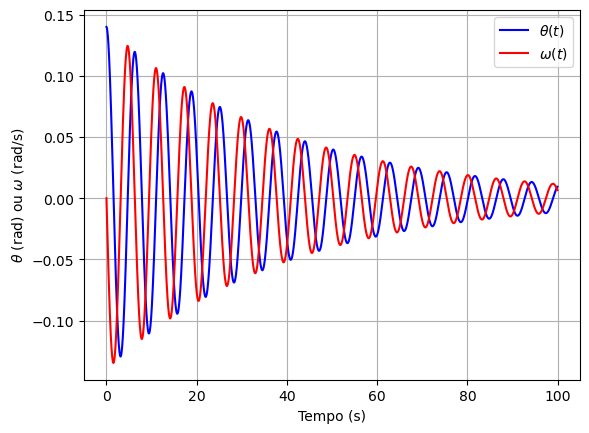

In [10]:
f5, ax5 = plt.subplots()
ax5.plot(df1_g1['t'], df1_g1['theta'], color='blue', label='$\\theta(t)$')
ax5.plot(df1_g1['t'], df1_g1['w'], color='red', label='$\\omega(t)$')
ax5.set_xlabel('Tempo (s)')
ax5.set_ylabel('$\\theta$ (rad) ou $\\omega$ (rad/s)')
ax5.grid()
ax5.legend()

## Gráfico de $\theta(t)$ e $\omega(t)$ para $F_0 = 0$ e $\gamma = 0.5$

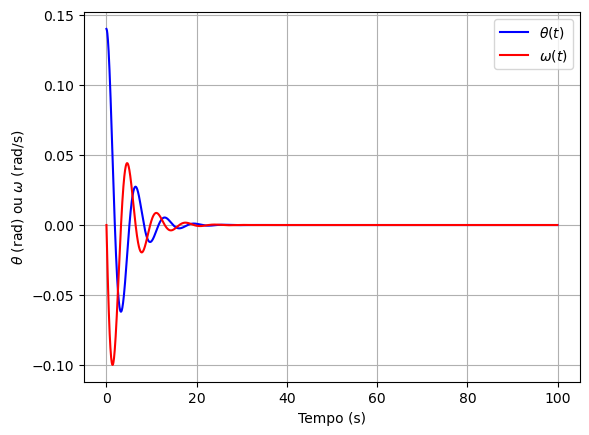

In [11]:
f9, ax9 = plt.subplots()
ax9.plot(df1_g2['t'], df1_g2['theta'], color='blue', label='$\\theta(t)$')
ax9.plot(df1_g2['t'], df1_g2['w'], color='red', label='$\\omega(t)$')
ax9.set_xlabel('Tempo (s)')
ax9.set_ylabel('$\\theta$ (rad) ou $\\omega$ (rad/s)')
ax9.grid()
ax9.legend()

## Gráfico de $\theta(t)$ e $\omega(t)$ para $F_0 = 0.5$ e $\gamma = 0.05$

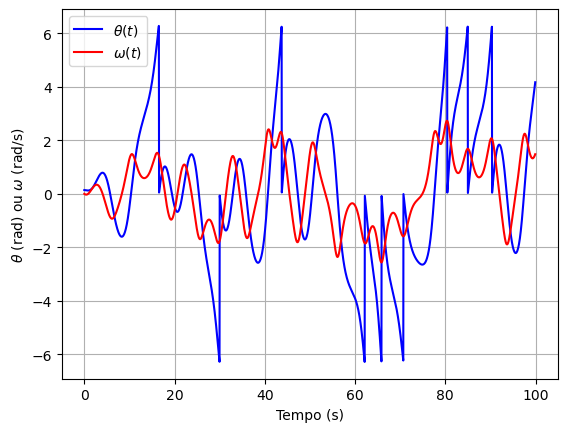

In [12]:
f10, ax10 = plt.subplots()
ax10.plot(df2_g1['t'], df2_g1['theta'], color='blue', label='$\\theta(t)$')
ax10.plot(df2_g1['t'], df2_g1['w'], color='red', label='$\\omega(t)$')
ax10.set_xlabel('Tempo (s)')
ax10.set_ylabel('$\\theta$ (rad) ou $\\omega$ (rad/s)')
ax10.grid()
ax10.legend()


## Gráfico de $\theta(t)$ e $\omega(t)$ para $F_0 = 0.5$ e $\gamma = 0.5$

In [13]:
dft_transform=np.fft.fft(df2_g2['theta'])[0:len(df2_g2['theta'])//2]
dt=0.04
frequencias=np.fft.fftfreq(len(df2_g2['theta']),dt)[0:len(df2_g2['theta'])//2]

frequencia_fft=frequencias[np.argmax(np.abs(dft_transform))]
periodo_fft = 1/frequencia_fft

first_max_t = float(df2_g2[np.isclose(df2_g2['theta'], df2_g2['theta'].max())]['t'])
print(f"first max: {first_max_t}")
print(f"first max + T_fft: {first_max_t+periodo_fft}")

first max: 12.76
first max + T_fft: 21.84727272727273


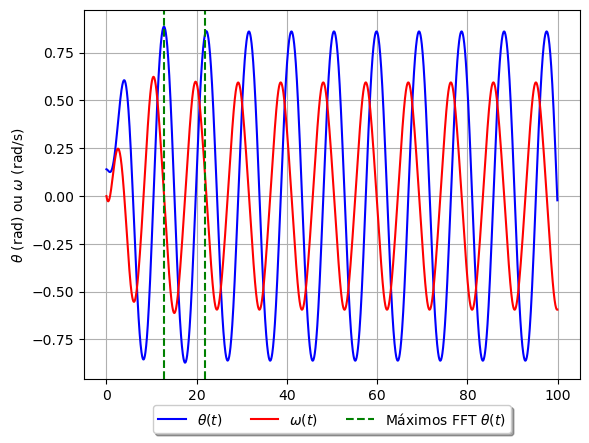

In [14]:
f6, ax6 = plt.subplots()
ax6.plot(df2_g2['t'], df2_g2['theta'], color='blue', label='$\\theta(t)$')
ax6.plot(df2_g2['t'], df2_g2['w'], color='red', label='$\\omega(t)$')
ax6.set_xlabel('Tempo (s)')
ax6.set_ylabel('$\\theta$ (rad) ou $\\omega$ (rad/s)')
ax6.axvline(first_max_t, color='green', linestyle='--')
ax6.axvline(first_max_t+periodo_fft, color='green', linestyle='--', label='Máximos FFT $\\theta(t)$')
ax6.grid()
ax6.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3)


## Gráfico de $\theta(t)$ e $\omega(t)$ para $F_0 = 1.2$ e $\gamma = 0.05$

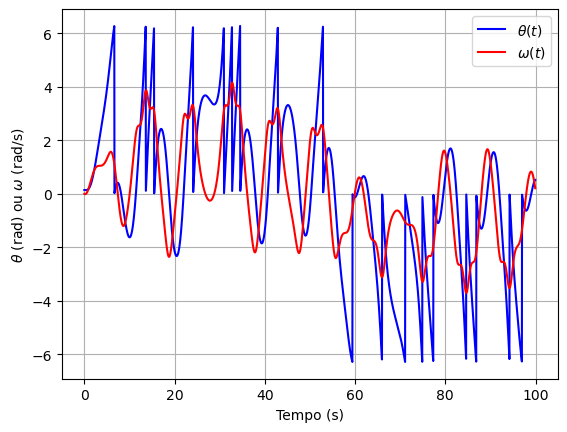

In [15]:
f7, ax7 = plt.subplots()
ax7.plot(df3_g1['t'], df3_g1['theta'], color='blue', label='$\\theta(t)$')
ax7.plot(df3_g1['t'], df3_g1['w'], color='red', label='$\\omega(t)$')
ax7.set_xlabel('Tempo (s)')
ax7.set_ylabel('$\\theta$ (rad) ou $\\omega$ (rad/s)')
ax7.grid()
ax7.legend()

## Gráfico de $\theta(t)$ e $\omega(t)$ para $F_0 = 1.2$ e $\gamma = 0.5$

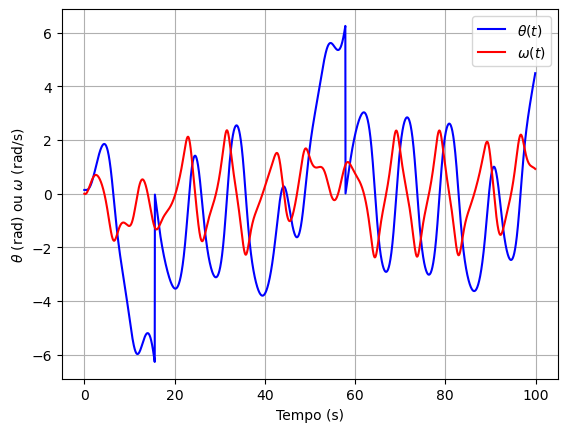

In [16]:
f8, ax8 = plt.subplots()
ax8.plot(df3_g2['t'], df3_g2['theta'], color='blue', label='$\\theta(t)$')
ax8.plot(df3_g2['t'], df3_g2['w'], color='red', label='$\\omega(t)$')
ax8.set_xlabel('Tempo (s)')
ax8.set_ylabel('$\\theta$ (rad) ou $\\omega$ (rad/s)')
ax8.grid()
ax8.legend()